<a href="https://colab.research.google.com/github/eduardogranillo/FisicaComputacional/blob/master/Actividad8/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas de clase

In [3]:
# Haremos uso de funciones que ofrece SciPy para integrar ecuaciones
# diferenciales ordinarias scipy.integrate. Veremos primero la función
# scipy.integrate.odeint y después la función scipy.integrate.solve_ivp.

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

### Solución Numérica de Ecuaciones Diferenciales con Python.

Iniciamos el tema definiendo la forma general de una [ecuación difererencial ordinaria](https://en.wikipedia.org/wiki/Ordinary_differential_equation), definida por un polinomio de una combinación de derivadas de distinto orden de una función $y(t)$

\begin{equation*} 
a_0(t) y + a_1(t) y' + 
a_2(t) y'' + \cdots + 
a_n(t) y^{(n)} + b(t) = 0
\end{equation*}

donde $a_0(t), a_1(t), a_2 (t), \ldots , a_n(t)$ y $b(t)$ son funciones diferenciables arbitrarias no necesariamente lineales y 
$y', y'', \ldots, y^{n}$ son las derivadas consecutivas de la función desconocida $y(t)$.

No todas las ecuaciones diferenciales pueden ser resueltas de forma analítica, por lo que se recurre a buscar las soluciones de forma numérica. 

### Sistema de Ecuaciones diferenciales ordinarias.

Una ecuación diferencial de orden $k$, puede ser resuelta de forma más fácil si podemos reducirla a un sistema de $k$ ecuaciones de primero orden.
La ecuación diferencial

\begin{eqnarray*}
a_0 y(t) + a_1(t) y' + 
a_2(t) y'' + \cdots + 
a_{k-1}(t) y^{k-1} & = & y^{k} \\
F(t, y, y', y'', 
\ldots , y^{k-1}) & = & y^{k}
\end{eqnarray*}

se puede reescribir, definiendo $y_1, y_2, \ldots, y_{k-1}$ funciones dependientes de $t$

\begin{eqnarray*}
y_1' & = & y_2 \\
y_2' & = & y_3 \\
y_3' & = & y_4 \\
\vdots &  & \vdots \\
y_{k-1}^{\prime} & = & y_k \\
y_k^{\prime} & = & F(t, y_1, y_2, \ldots , y_k)
\end{eqnarray*}

o escrita vectorialmente como

\begin{equation*}
\vec{y}_k^{\prime} = \vec{F}(t, \vec{y})
\end{equation*}

### Método de Euler.

El [método de Euler](https://en.wikipedia.org/wiki/Euler_method) es un método de primer orden de integración de una ecuación diferencial.

\begin{equation*}
y^{\prime} = f(t, y(t)), \ \ \mathrm{para} \ \ y(t_0) = y_0  
\end{equation*}

De existir la solución de ésta ecuación diferencial, hay una familia de soluciones $y(t) + c$, y la condición inicial $y(t_0)=y_0$ selecciona la única solución que la satisface. 

Para un incremento temporal discreto $h$, la solución la la ecuación diferencial se puede aproximar a primer orden (Serie de Taylor de orden 1)

\begin{equation*}
y_{n+1} = y_n + h f(t_n, y_n)
\end{equation*}

Se dice que éste método es explícito, dado que se requiere conocer la información de la función $y_n=y(t_n)$ al tiempo $t_n=t_0+n h$ para predecir la solución $y_{n+1}$. 

El error depende del tamaño del paso $h$, pero también al reducir el tamañp $h$ requiere realizar computacionalmente más pasos.  


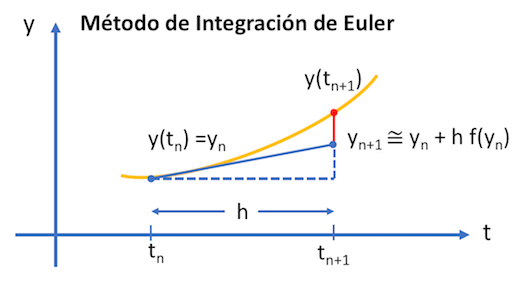

In [4]:
def odeEuler(f,y0,t):
  '''Aproxima la solución de y'=f(y,t) por el método de Euler.

  Parámetros
  ----------
  f: La función dada por el lado derecho de la ecuación diferencial
     y'=f(t,y), y(t_0)=t_0
  y0: El valor inicial de y al tiempo y(t0)=y0
  t: Arreglo unidimensional de 1D. El tamaño del paso h=t[n+1]-t[n].

  Regresa
  ----------
  y: 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada
  con el método de Euler.
  '''
  # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
  y=np.zeros(len(t))

  # La condición inicial que debe satisfacer la solución
  y[0]=y0

  # La integración por el método de Euler
  for n in range(0,len(t)-1):
    y[n+1] = y[n] + f(y[n],t[n])*(t[n+1]-t[n])
  return y

     

### Ejemplos

**Función exponencial**

Nos interesa resover la ecuación diferencial

\begin{equation*}
y^{\prime} = y, \ \ \mathrm{para} \ y_0=1
\end{equation*}

en el dominio $t \in [0,2]$. 

Conocemos que la solución analítica de la ecuación diferencial anterior es $y(t) = \exp (t)$. Podremos constrastar la solución numérica del método de Euler con la solución analítica.


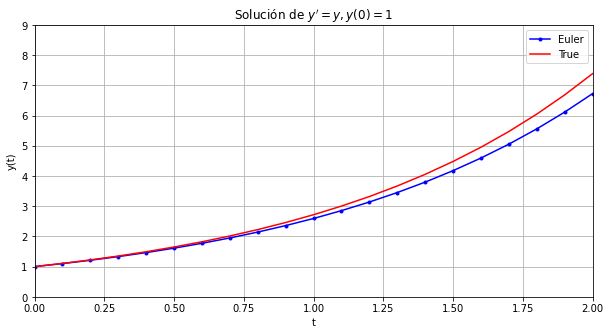

In [5]:
# Solución numérica
# Tomamos un h=0.1
t = np.linspace(0,2,21)
y0 = 1
# Definimos la función f(t,y) = y
f = lambda y,t: y
# La solución de la ecuación diferencial usando el método de Euler
y = odeEuler(f,y0,t)
# La solución analítica conocida
y_true = np.exp(t)

plt.figure(figsize=(10,5))
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid()
plt.title("Solución de $y'=y , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

**Ecuación diferencial no  lineal**

Buscamos la solución de la ecuación diferencial 

\begin{equation*}
y^{\prime} = y^2 \ \mathrm{para} \ y(0) = -1
\end{equation*}

en el dominio $t \in [0,5]$. Se conoce la solución analítica de la ecuación anterior. 

\begin{equation*}
y(t) = \frac{-1}{t+1}
\end{equation*}

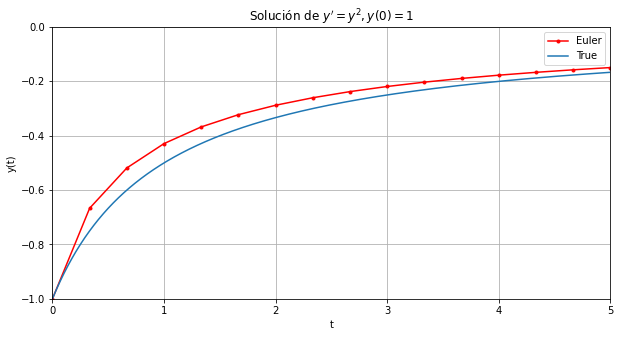

In [6]:
t = np.linspace(0,5,16)
y0 = -1
# Definimos la función f(t,y) = y**2
f = lambda y,t: y**2
# Usamos el método de Euler
y = odeEuler(f,y0,t)
t_true = np.linspace(0,5,1000)
y_true = -1/(t_true + 1)

plt.figure(figsize=(10,5))
plt.plot(t,y,'r.-',t_true,y_true)
plt.legend(['Euler','True'])
plt.grid()
plt.axis([0,5,-1,0])
plt.title("Solución de $y'=y^2 , y(0)=1$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

**Ecuación diferencial de Segundo Orden.** 

La ecuación de movimiento de un péndulo de masa $m$, longitud $l$ está dada por 

\begin{equation*}
\frac{d^2 \theta}{d t^2} + b \frac{d \theta}{dt} +  \frac{g}{l} \sin \theta = 0
\end{equation*}

donde $b$ es un coeficiente de amortiguamiento (fricción),  $g$ es la aceleración debida a la fuerza de gravedad y $\theta$ es el ángulo de desplazamiento respecto a la vertical.

Para ángulos pequeños $\theta << 1$, la función $\sin (\theta) \approx \theta$, tendremos la ecuación


\begin{equation*}
\frac{d^2 \theta}{d t^2} + b \frac{d \theta}{dt}+ \frac{g}{l} \theta = 0
\end{equation*}

Definiendo $d\theta / dt = \omega$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

\begin{eqnarray*}
\frac{d \theta}{dt} & = & \omega = f_1(t)\\
\frac{d \omega}{dt} & = & -b \omega - k \theta = f_2(t)\\ 
\end{eqnarray*}

donde $k = g/l$. 

La ecuación anterior se puede escribir vectorialmente como

\begin{equation*}
\frac{d}{dt} \vec{y} = \begin{bmatrix}
0 & 1 \\
-k & -b \\
\end{bmatrix} \vec{y} = A \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))
\end{equation*}

donde 
\begin{equation*}
\vec{y} = \begin{bmatrix}
\theta \\
\omega \\
\end{bmatrix}
\end{equation*}

La biblioteca SciPy tiene una función para integrar sistemas de ecuaciones diferenciales [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). Haremos uso de ella. 



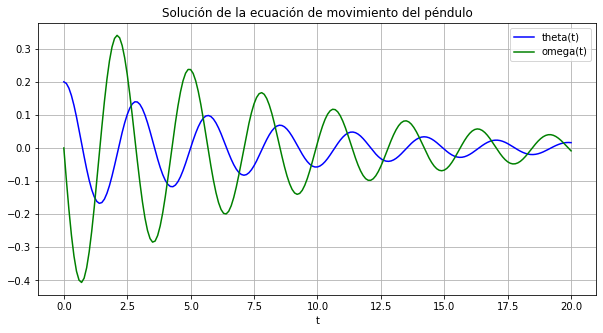

In [7]:
from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuación diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def pendulo(y, t, b, k):
      theta, omega = y
      dydt= [omega, -b*omega - k*theta]
      return dydt

# Definimos las constantes g, la longitud l del péndulo y el coeficiente de fricción b.
g = 9.81
l = 2.0

k = g/l
b = 0.25

# Definimos las condiciones iniciales theta=0.2m y omega = 0 (el pendulo se "suelta")
y0 = [0.2, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 20, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(pendulo, y0, t, args=(b,k))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.plot(t, y[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del péndulo')
plt.xlabel('t')
plt.grid()
plt.show()


# **Ejercicio 1:**

Resuelva la ecuación diferencial del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal. 

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]



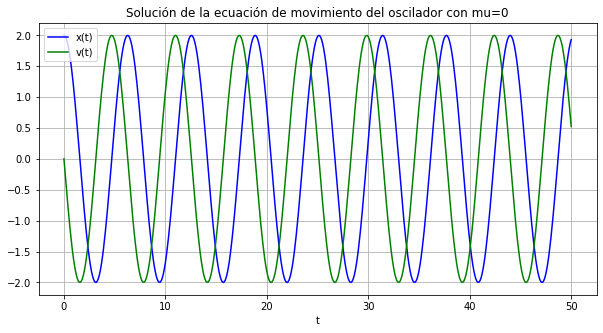

In [8]:
from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuación diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def oscilador(y, t, mu):
  x, v = y
  dydt = [v, -x+mu*(1-x**2)*v]
  return dydt


# Definimos las constantes mu
mu = 0

# Definimos las condiciones iniciales, posición inicial x=1, velocidad inicial v=0
y0 = [2, 0]

# Definimos el tiempo de integración de 0 a 50 segundos (501 puntos, h=0.1)
t = np.linspace(0, 50, 501)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()


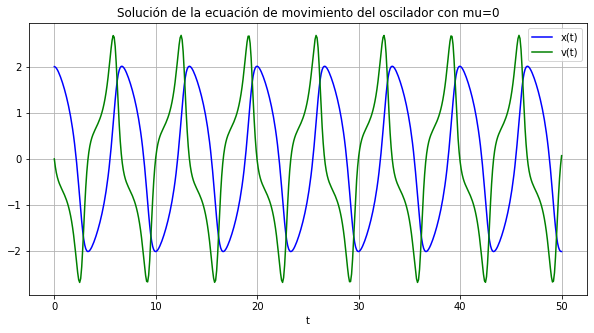

In [9]:
# Para mu=1
mu = 1

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

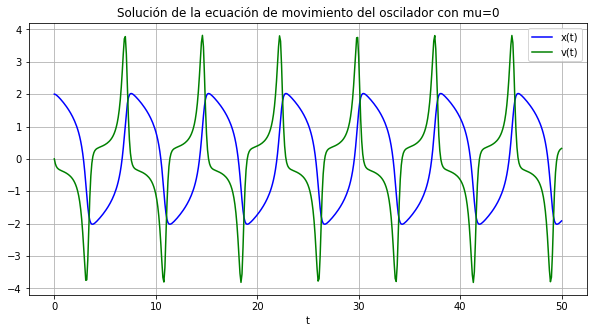

In [10]:
# Para mu=2
mu = 2

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

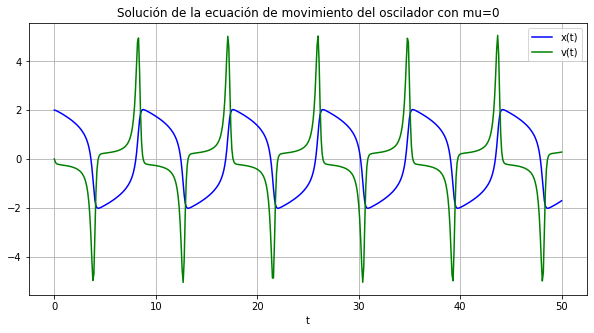

In [11]:
# Para mu=3
mu = 3

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

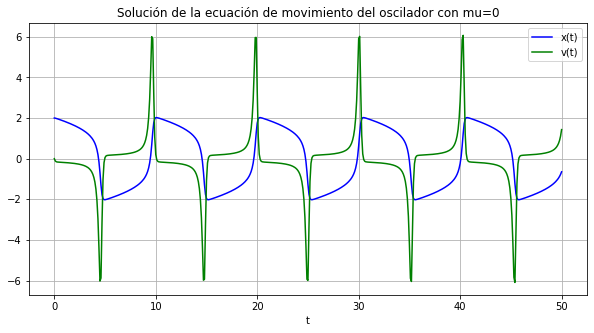

In [12]:
# Para mu=4
mu = 4

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

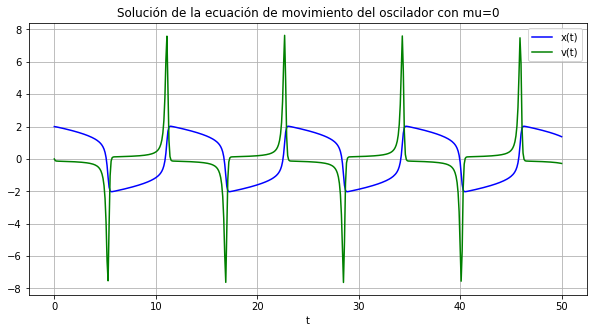

In [13]:
# Para mu=5
mu = 5

y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')

plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 2:**

Siguiendo con el ejemplo anterior del [oscilador de Van de Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator), reproduce la gráfica del [plano fase](https://en.wikipedia.org/wiki/Phase_plane) ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo. 

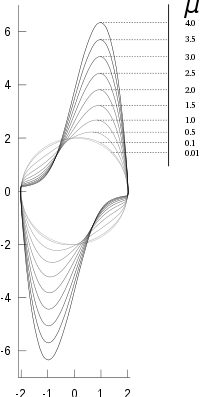

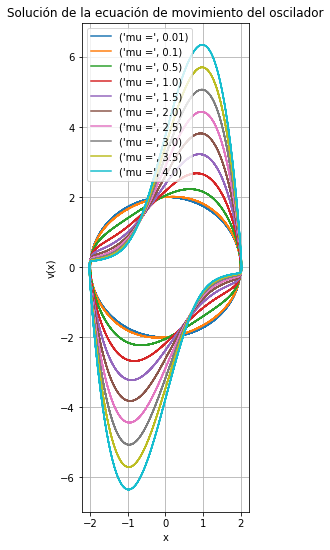

In [14]:
# Definimos el tiempo de integración de 0 a 50 segundos

t = np.linspace(0, 50, 10000)

plt.figure(figsize=(3, 9))
for mu in 0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0:
  y = odeint(oscilador, y0, t, args=(mu,))
  plt.plot(y[:,0], y[:,1], label=("mu =", mu))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid()
plt.show()

### Métodos de Runge-Kutta

Los [métodos de Runge-Kutta](https://en.wikipedia.org/wiki/Runge–Kutta_methods) son una serie de algoritmos [explícitos e implícitos](https://en.wikipedia.org/wiki/Explicit_and_implicit_methods) para resolver ecuaciones diferenciales ordinarias.

Entre esta familia de métodos el [método de Runge-Kutta RK4](https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method) es el más conocido de ellos, que utiliza para resolver el problema de valor inicial

\begin{equation*}
\frac{dy}{dy} = f(t,y), \ \ y(t_0) = y_0
\end{equation*}

Se conoce tanto $f(t,y)$, y la [condición inicial](https://en.wikipedia.org/wiki/Initial_condition) al tiempo $t_0$,  $y_0$. 

Para un paso temporal de $h$, el método RK4 es

\begin{eqnarray*}
y_{n+1} & = & y_n + \frac{1}{6} h (k_1 + 2 k_2 + 2 k_3 + k_4) \\
t_{n+1} & = & t_n + h
\end{eqnarray*}

para $n=0,1,2,3,\ldots$, donde

\begin{eqnarray*}
k_1 & = & f(t_n, y_n)   \\
k_2 & = & f(t_n + \frac{h}{2}, y_n + h \frac{k_1}{2})  \\
k_3 & = & f(t_n + \frac{h}{2}, y_n + h \frac{k_2}{2})   \\
k_4 & = &  f(t_n + h, y_n + h k_3)  \\
\end{eqnarray*}

El método de Runge-Kutta RK4 es un método de cuarto orden, por lo que el error es $O(h^5)$.

Gráficamente el método RK4 se puede representar como

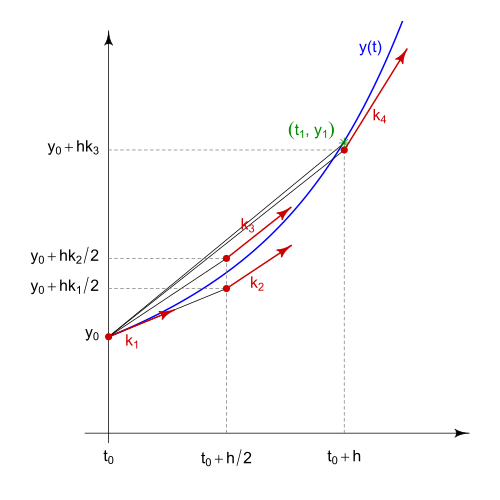

In [15]:
# Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6) # or version string or something
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

**Ejemplo 1:** 

Resolveremos la ecuación diferencial ordinaria

\begin{equation*}
y' = y -t^2 + 1, \ \ y(0)=0.5
\end{equation*}

en el intervalo $t \in [0,2]$. 
Se conoce que la solución analítica de esta EDO es

\begin{equation*}
y = t^2 + 2 t + 1 - \frac{1}{2} \exp(t)
\end{equation*}

Contrastaremos las 2 soluciones: la obtenida por el RK4 contra la analítica. 

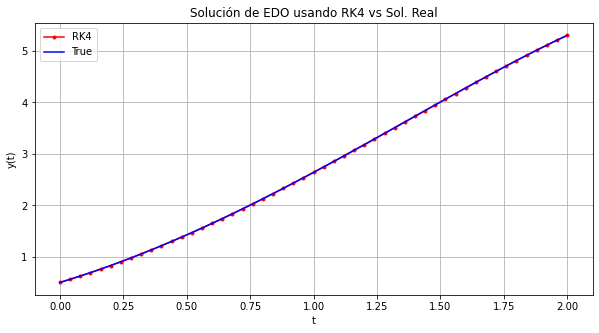

In [16]:
# Definimos la parte derecha de la ecuación
def f(t, y):
    return (y-t**2+1)

# Condiciones iniciales
t_0 = 0.0
y_0 = 0.5

# Paso de integración h
a = 0
b = 2.0 
Npts = 50
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = runge_kutta(f, t, y, h)
  t_values.append(t)
  y_values.append(y)


# Graficar la solución

t_true = np.linspace(a,b,Npts)
y_true = t_true**2 + 2*t_true + 1 - 0.5*np.exp(t_true)

plt.figure(figsize=(10,5))
plt.plot(t_values,y_values,'r.-', label='RK4')
plt.plot(t_true,y_true,'b', label='True')
plt.legend(['RK4','True'])
plt.grid()
plt.title("Solución de EDO usando RK4 vs Sol. Real")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


**Ejemplo:** 

Resolver la ecuación diferencial 

\begin{equation*}
y' = \frac{5 t^2 -y}{\exp(t+y)}, 
\end{equation*}

en el intervalo $t \in [0,10]$, con $y(0)=1.0$.

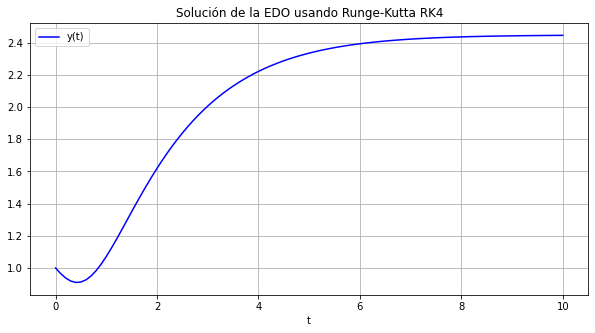

In [17]:
# Ejemplo:

# Definimos la parte derecha de la ecuación
def f(t, y):
    return (5*t**2 - y) / (np.exp(t+y))


# Condiciones iniciales
t_0 = 0.0
y_0 = 1.0

# Paso de integración h = (b-a)/Npts
a=0
b=10.0
Npts=100
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = runge_kutta(f, t, y, h)
  t_values.append(t)
  y_values.append(y)


# Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t_values, y_values, 'b', label='y(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()


**scipy.integrate.solve_ivp**

La biblioteca *SciPy.integrate* tiene la función [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) problemas de valor inicial de ecuaciones diferenciales ordinarias.

Volvemos a resolver la ecuación diferencial 

\begin{equation*}
y' = \frac{5 t^2 -y}{\exp(t+y)}, 
\end{equation*}

en el intervalo $t \in [0,10]$, con $y(0)=1.0$.


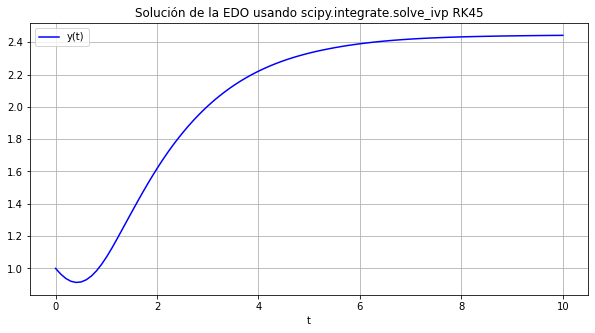

In [18]:
from scipy.integrate import solve_ivp

# Definimos la parte derecha de la ecuación
def f(t, y):
    return (5*t**2 - y) / (np.exp(t+y))


# Condiciones iniciales
t_0 = 0.0
y_0 = [1.0]


# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=10.0
Npts=100

# Los puntos de t donde será evaluada la solución.
t=np.linspace(t0,tmax,Npts)

sol = solve_ivp(f, (t0,tmax), y0=y_0, method='RK45', t_eval=t)
# El resultado de la función solve_ip contiene diversa información. 
# La infomación de interés es la solución numérica 'sol.y[0]'

y = sol.y[0]

# Graficar la solución
plt.figure(figsize=(10,5))
plt.plot(t, y, 'b', label='y(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando scipy.integrate.solve_ivp RK45')
plt.xlabel('t')
plt.grid()
plt.show()


Ejemplo

La emplearemos para resolver la ecuación de Van der Pol vista en el Ejercicio 2.

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

La ecuación diferencial anterior de segundo orden se puede escribir como un sistema de 2 ecuaciones de primer orden

\begin{eqnarray*}
\frac{dx}{dt} & = & v = f_1\\
\frac{dv}{dt} & = & \mu (1 - x^2) v - x = f_2 \\ 
\end{eqnarray*}


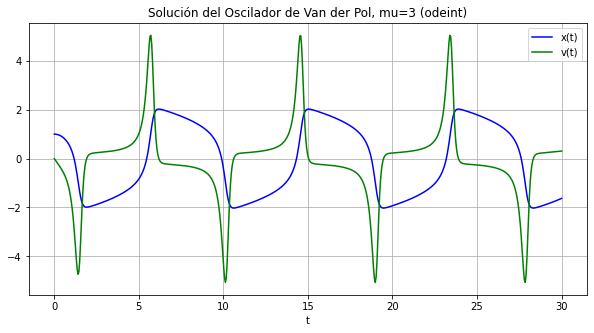

In [19]:
# Integración utilizando 'odeint'

from scipy.integrate import solve_ivp, odeint

# definimos la función F de lado derecho de la ecuación.
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt


# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

# Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts)

# Definimos el coeficiente mu
mu=3.0

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label='x(t)')
plt.plot(t, y2, 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu=3 (odeint)')
plt.xlabel('t')
plt.grid()
plt.show()



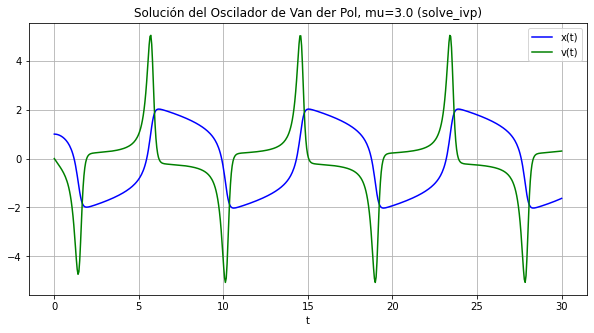

In [20]:
# Utilizando scipy.integrate.solve_ivp

from scipy.integrate import solve_ivp, odeint

# definimos la función F de lado derecho de la ecuación.
def VanderPol(t,y,mu):
      dydt = [y[1], mu*(1 - y[0]**2)*y[1] - y[0]]
      return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600

# Condiciones iniciales
# Definimos el coeficiente mu
mu=3.0

# Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [1.0, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(t0,tmax,Npts)

abserr = 1.0e-8
relerr = 1.0e-6

sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, mu),(t0,tmax), y0=y_0, method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
#print(sol)

# La solución regresa ambas x(t) y v(t)
y1=sol.y[0]
y2=sol.y[1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label='x(t)')
plt.plot(t, y2, 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu=3.0 (solve_ivp)')
plt.xlabel('t')
plt.grid()
plt.show()



# **Ejercicios 3:**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:


*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función *scipy.integrate.odeint* ó *scipy.integrate-solve_ivp*

**Ejercicio 3.1:** 

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

**Ejercicio 3.2:**

\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}

**Ejercicio 3.3:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}

Grafique las soluciones como funciones del tiempo. 


**Ejercicio 3.1:** 

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

Tenemos
\begin{equation*}
\frac{dv}{dt} + kv^2 -g = 0, \ x(0)=0, \ v(0). = 0, \ k>0.
\end{equation*}


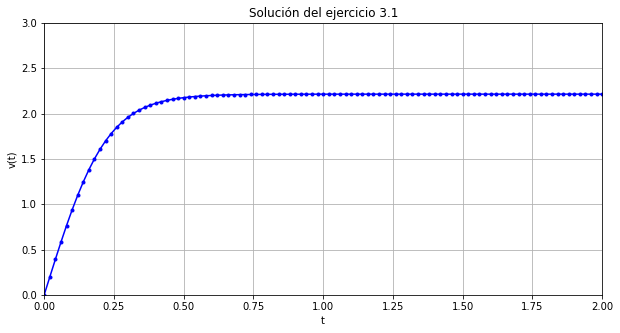

In [21]:
# Método de Euler

# Solución numérica
# Tomamos un h=0.1
t = np.linspace(0,2,101)
x0 = 0 
g = 9.81
k = 2.0

# Definimos la función f(t,y) = y
f = lambda v,t: g - k*v**2
# La solución de la ecuación diferencial usando el método de Euler
v = odeEuler(f, x0, t)

plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-')
plt.axis([0,2,0,3])
plt.grid()
plt.title("Solución del ejercicio 3.1")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.show()

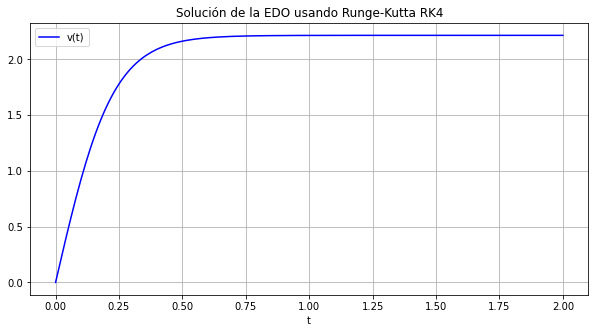

In [22]:
# Método RK4

# Definimos la parte derecha de la ecuación
def f(x, v):
    return (g - k*v**2)


# Condiciones iniciales
t_0 = 0.0
x_0 = 0.0
g = 9.81
k = 2.0

# Paso de integración h = (b-a)/Npts
a=0
b=2.0
Npts=201
h = (b-a)/Npts

t_values = [t_0]
x_values = [x_0]

# Calcula la solución con RK4
t = t_0
x = x_0

for _ in range(Npts):
  t, x = runge_kutta(f, t, x, h)
  t_values.append(t)
  x_values.append(x)

# Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t_values, x_values, 'b', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()

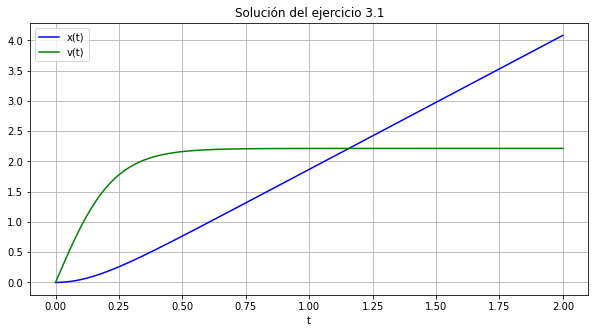

In [23]:
# Método odeint

from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuación diferencial
# La solución y es un arreglo 1-D, x=(t, v), dx/dt es un arreglo

def funcion31(x, t, g, k):
      t, v = x
      dxdt= [v, g - k*v**2]
      return dxdt

# Definimos las constantes g y k.
g = 9.81
k = 2.0


# Definimos las condiciones iniciales x = 0 y v = 0 en t=0
x0 = [0.0, 0.0]

# Definimos el tiempo de integración de 0 a 2 segundos (101 puntos, h=0.01)
t = np.linspace(0, 2, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(funcion31, x0, t, args=(g,k))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del ejercicio 3.1')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2:**

\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}

\begin{equation*}
\frac{dy}{dx} = v \frac{d^2 y}{d x^2} = a = -\frac{2}{x} v - y^5
\end{equation*}

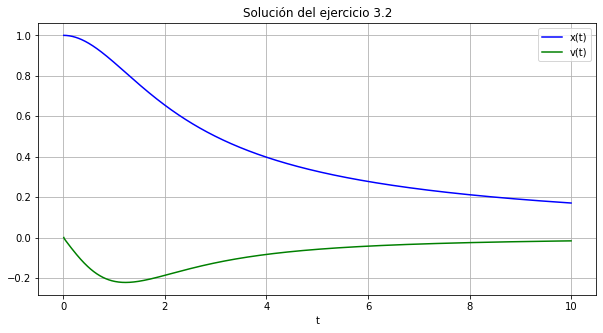

In [43]:
# Método Odeint

# Definimos la función F(t,y), el lado derecho de la ecuación diferencial
# La solución y es un arreglo 1-D, x=(t, v), dx/dt es un arreglo

def funcion32(a, x):
      y, v = a
      dadx= [v, (-2/x)*v-y**5]
      return dadx


# Definimos las condiciones iniciales y = 1 y v = 0 en t=0
y0 = [1.0, 0.0]

# Definimos el tiempo de integración de 0.01 a 10 segundos (1001 puntos, h=0.01)
t = np.linspace(0.01, 10, 1001)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(funcion32, y0, t)

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del ejercicio 3.2')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.3:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}

Entonces

\begin{equation*}
\frac{dy}{dx} = f_1(x) = v
\end{equation*}

\begin{equation*}
\frac{dv}{dx} = f_2(x) = a
\end{equation*}

\begin{equation*}
\frac{da}{dx} = f_3(x) = (x-1)^2+y^2+v-2
\end{equation*}

Escribiendola vectorialmente
\begin{equation*}
\frac{d}{dx} \vec{c} = \vec{F}(x,\vec{c}) = (f_1(x),f_2(x),f_3(x))
\end{equation*}

donde
\begin{equation*}
 \vec{c} = \begin{bmatrix}
y \\
v \\
a
\end{bmatrix}
\end{equation*}


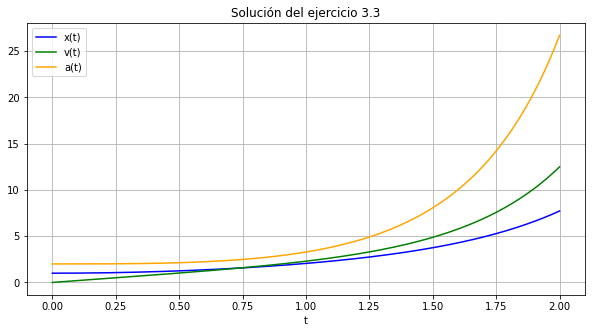

In [50]:
# Método Odeint

# Definimos la función F(t,y), el lado derecho de la ecuación diferencial
# La solución y es un arreglo 1-D, x=(t, v), dx/dt es un arreglo

def funcion33(c, x):
      y, v, a = c
      dcdx= [v, a, (x-1)**2 + y**2 + v - 2]
      return dcdx


# Definimos las condiciones iniciales y = 1 , v = 0 y a = 2 en t=0
y0 = [1.0, 0.0, 2.0]

# Definimos el tiempo de integración de 0.01 a 2 segundos (201 puntos, h=0.01)
t = np.linspace(0.0, 2, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(funcion33, y0, t)

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.plot(t, y[:, 2], 'orange', label='a(t)')
plt.legend(loc='best')
plt.title('Solución del ejercicio 3.3')
plt.xlabel('t')
plt.grid()
plt.show()